What Is Fake News ?

False news, also known as unwanted news, false stories, misconceptions or fraudulent stories, types of stories that contain deliberate information or frauds that are spread through traditional media (print and broadcast) or online media. Digital news has revived and increased the use of fake news, or yellow journalism. These stories are often referred to as information that is not in the media but sometimes finds its way into the mainstream media as well.

It causes panic
Damaging the reputation of public and private organizations
It deceives the people, for the benefit of the deceivers
Motivated by a personal vendetta, some people support such things.


PROBLEM :
How to distinguish between a real news and a fake news?


SOLUTION :

We can show an algorithm that has a large number of false and real news stories to learn to distinguish between them automatically, and then give a possible score or percentage of confidence such as a given news release is true or false.

# Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np

#Miscellaneous
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Fake.csv")
df =pd.read_csv("True.csv")

#  Exploratory Data Analysis

In [3]:
data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
# Now combining these two dataset to one dataset to simplify processing.
# Also to combine we need to add an extra column as 'temp' to differtiate news as 1=true_news 0=fake_news

df['temp']= 0
data['temp']= 1

datas = pd.DataFrame()
datas = data.append(df)

In [6]:
datas.head()

,title,text,subject,date,temp
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [7]:
print(datas.shape)

(44898, 5)


In [8]:
#Column 'Date' and 'Subject' are important to Descriptive analysis but here for prediction they are less important so 
#dropping these columns.
column = ['date','subject']
datas = datas.drop(columns=column)

In [9]:
print(datas.shape)

(44898, 3)


In [10]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44898 non-null  object
 1   text    44898 non-null  object
 2   temp    44898 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [11]:
#Created array of 'title' column as input_array for preprocessing
input_arr=np.array(datas['title'])

# Using Natural Language Processing

In [12]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
#Using nltk and importing Stopwords(For dealing with stopwords) and PortStemmer(For stemming)
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []

for i in range(0, 40000):
    newArr = re.sub('[^a-zA-Z]', ' ', input_arr[i])
    #The sub() function replaces the matches with the text of your choice,
    #in this case "[a-zA-Z]" is getting replaced with blank space
    #input_arr[i] is the array of 'title' column.

    #[a-zA-Z]: Returns a match for any character alphabetically between a and z, lower case OR upper case

    newArr = newArr.lower()
    #Converting into lowercase
    
    #The split() method splits a string into a list.
    newArr = newArr.split()

    ps = PorterStemmer()
    newArr = [ps.stem(word) for word in newArr if not word in set(stopwords.words('english'))]
    #ps.stem(word) is stemming the words
    #the word will be considered if the word is not a stopword
    #set(stopwords.words('english')= checks any kind of stopwords in English language
    
    #joins the string with blank spaces
    newArr = ' '.join(newArr)
   
    #adding strings into the corpus list
    corpus.append(newArr)

In [14]:
datas

,title,text,temp
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1
...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,0


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
countv = CountVectorizer(max_features = 5000)
#max_features: The CountVectorizer will select the
#words/features/terms which occur the most frequently.
#It takes absolute values so if you set the ‘max_features = 3’,
#it will select the 3 most common words in the data.

X = countv.fit_transform(corpus).toarray()
y = datas.iloc[0:40000, 2].values

# Modelling

In [16]:
#Splitting the dataset into the Training set and Test set in 80-20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [17]:
#Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [18]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)

# Model Evaluation

In [19]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3110  216]
 [ 239 4435]]


In [20]:
#Getting more details
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3326
           1       0.95      0.95      0.95      4674

    accuracy                           0.94      8000
   macro avg       0.94      0.94      0.94      8000
weighted avg       0.94      0.94      0.94      8000



TP – True Positives TN - True Negatives FP – False Positives FN – False Negatives

Precision: Accuracy of positive predictions. Precision = TP/(TP + FP)

Recall: Fraction of positives that were correctly identified. Recall = TP/(TP+FN)

F1 score – Percent of positive predictions were correct. F1 Score = 2(Recall Precision) / (Recall + Precision)

In [24]:
#Getting Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')
#print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))

Accuracy: 94.31%


In [22]:
#Confusion matrix in a well plotted chart
import seaborn as sns
import matplotlib.pyplot as plt

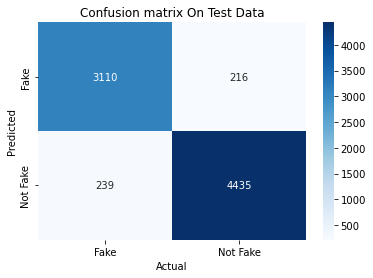

In [23]:
new_cm = pd.DataFrame(cm , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

Summary

Today, we learned to detect fake news with Python. We took a political dataset, implemented a TfidfVectorizer, initialized a PassiveAggressiveClassifier, and fit our model. We ended up obtaining an accuracy of 94.31% in magnitude.